<a href="https://colab.research.google.com/github/NitishaJonnada/nitisha_INFO5731_Spring2023/blob/main/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [1]:
# Write your code here

import pandas as pd
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from nltk.stem import PorterStemmer
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def reading_data(file_path):
  text_data, sentiments = [], []
  file_data = open(file_path).read()
  for i, j in enumerate(file_data.split("\n")):
    after_split = j.split(' ')
    text_data.append(" ".join(after_split[1:]))
    sentiments.append(after_split[0])
  return text_data, sentiments

In [4]:

training_text_data, training_sentiments = reading_data('/content/stsa-train.txt')
training_df = pd.DataFrame(list(zip(training_sentiments, training_text_data)), columns = ['Sentimental Value', 'Raw Data'])
testing_text_data, testing_sentiments = reading_data('/content/stsa-test.txt')
testing_df = pd.DataFrame(list(zip(testing_sentiments, testing_text_data)), columns = ['Sentimental Value', 'Raw Data'])

In [5]:
#Pre-processing
#removal of special characters
training_df['After noise removal'] = training_df['Raw Data'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
testing_df['After noise removal'] = testing_df['Raw Data'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
# removal of Punctuation
training_df['Punctuation removal'] = training_df['After noise removal'].str.replace('[^\w\s]','')
testing_df['Punctuation removal'] = testing_df['After noise removal'].str.replace('[^\w\s]','')
# Stopwords removal
stop_word = stopwords.words('english')
training_df['Stopwords removal'] = training_df['Punctuation removal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
testing_df['Stopwords removal'] = testing_df['Punctuation removal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
# Lower Casing
training_df['Lower casing'] = training_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
testing_df['Lower casing'] = testing_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
tfidf_vector = TfidfVectorizer(analyzer = 'word')
tfidf_vector.fit(training_df['Lower casing'])
x =  tfidf_vector.transform(training_df['Lower casing'])
tfidf_vector_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vector.vocabulary_)
tfidf_vector_test.fit(testing_df['Lower casing'])
test_values_x = tfidf_vector_test.transform(testing_df['Lower casing'])


In [7]:
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, training_df['Sentimental Value'],test_size=0.2)

In [8]:
def csv(model, x_data, y_data):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7, shuffle=True)
  return cross_val_score(model, x_data, y_data, cv=kfold).mean()

In [9]:
def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(predicted, yvalid)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))
  predicted_testing = model.predict(test_values_x)
  accuracy_testing = accuracy_score(predicted_testing, testing_df['Sentimental Value'])
  print("Accuracy of Testing data: {0}".format(accuracy_testing))
  print(classification_report(testing_df['Sentimental Value'], predicted_testing))
  if 'XGB' not in str(model):
    print("Cross validation score obtained: {0}".format(csv(model, test_values_x, testing_df['Sentimental Value'])))

In [10]:
training_model(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.7732851985559567
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       668
           1       0.75      0.85      0.80       717

    accuracy                           0.77      1385
   macro avg       0.78      0.77      0.77      1385
weighted avg       0.78      0.77      0.77      1385

Accuracy of Testing data: 0.8029637760702525
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.87      0.71      0.78       912
           1       0.76      0.89      0.82       909

    accuracy                           0.80      1822
   macro avg       0.54      0.54      0.53      1822
weighted avg       0.81      0.80      0.80      1822

Cross validation score obtained: 0.7365309553834145


In [11]:
training_model(svm.SVC())

Accuracy of Traning data: 0.7732851985559567
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       668
           1       0.77      0.81      0.79       717

    accuracy                           0.77      1385
   macro avg       0.77      0.77      0.77      1385
weighted avg       0.77      0.77      0.77      1385

Accuracy of Testing data: 0.7854006586169044
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.81      0.74      0.78       912
           1       0.76      0.83      0.79       909

    accuracy                           0.79      1822
   macro avg       0.52      0.52      0.52      1822
weighted avg       0.79      0.79      0.78      1822

Cross validation score obtained: 0.7217017954722873


In [12]:
training_model(KNeighborsClassifier(n_neighbors = 5))

Accuracy of Traning data: 0.488086642599278
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       668
           1       1.00      0.01      0.02       717

    accuracy                           0.49      1385
   macro avg       0.74      0.51      0.34      1385
weighted avg       0.75      0.49      0.33      1385

Accuracy of Testing data: 0.5054884742041712
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.50      1.00      0.67       912
           1       0.85      0.01      0.02       909

    accuracy                           0.51      1822
   macro avg       0.45      0.34      0.23      1822
weighted avg       0.67      0.51      0.35      1822

Cross validation score obtained: 0.5005464480874318


In [13]:
training_model(DecisionTreeClassifier())

Accuracy of Traning data: 0.6548736462093863
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       668
           1       0.67      0.65      0.66       717

    accuracy                           0.65      1385
   macro avg       0.65      0.66      0.65      1385
weighted avg       0.66      0.65      0.65      1385

Accuracy of Testing data: 0.6520307354555434
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.65      0.65      0.65       912
           1       0.65      0.65      0.65       909

    accuracy                           0.65      1822
   macro avg       0.43      0.43      0.43      1822
weighted avg       0.65      0.65      0.65      1822

Cross validation score obtained: 0.5993214435837386


In [14]:
training_model(RandomForestClassifier())

Accuracy of Traning data: 0.7299638989169676
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       668
           1       0.75      0.73      0.74       717

    accuracy                           0.73      1385
   macro avg       0.73      0.73      0.73      1385
weighted avg       0.73      0.73      0.73      1385

Accuracy of Testing data: 0.7381997804610319
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.73      0.75      0.74       912
           1       0.74      0.73      0.74       909

    accuracy                           0.74      1822
   macro avg       0.49      0.49      0.49      1822
weighted avg       0.74      0.74      0.74      1822

Cross validation score obtained: 0.6536810184351168


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [15]:
#Write your code here.
#import libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
data_df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

In [18]:
print("Shape: {0}".format(data_df.shape))

Shape: (413840, 6)


In [19]:
cluster_data_df = data_df.head(1000)
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [20]:
# removal of special characters
cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

#removal of punctations
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')

# Removing numbers
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')

#removal of stopwords
stop_word = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It decent price I one months The cons I pretty...,it decent price i one months the cons i pretty...,"[it, decent, price, i, one, months, the, cons,...",it decent price i one month the con i pretti f...,it decent price i one month the con i pretti f...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0,Is good cell phone,Is good cell phone,Is good cell phone,Is good cell phone,is good cell phone,"[is, good, cell, phone]",is good cell phone,is good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables case included also screen...,amazing phone cables case included also screen...,"[amazing, phone, cables, case, included, also,...",amaz phone cabl case includ also screen pritec...,amaz phone cabl case includ also screen pritec...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0,Excelent,Excelent,Excelent,Excelent,excelent,[excelent],excel,excel


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

(1000, 2483)

In [23]:
from sklearn.cluster import KMeans

model_tf = KMeans(n_clusters=10, random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=99)

In [24]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00081637, ..., 0.00038968, 0.00045181,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
terms1 = tfidf_vect.get_feature_names_out()

In [27]:
terms1[1:10]

array(['abil', 'abl', 'ablebto', 'about', 'absolut', 'abysm', 'accent',
       'accept', 'access'], dtype=object)

In [29]:
from sklearn import metrics
from sklearn.cluster import KMeans

silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
print("Silhouette Score:", silhouette_score_tf)


Silhouette Score: 0.08325604600506196


In [30]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,3
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,4
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,7
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,4


In [31]:
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     54
1     54
2     33
3     30
4    245
5     93
6     94
7    337
8     48
9     12
Name: Reviews, dtype: int64

In [32]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: good
 veri
 product
 phone
 price
 tank
 thank
 mobil
 it
 work
Cluster 1: great
 phone
 work
 easi
 use
 love
 expect
 good
 price
 thi
Cluster 2: excelent
 telefono
 producto
 zip
 foundat
 freedom
 free
 freak
 frame
 fraction
Cluster 3: recommend
 seller
 phone
 work
 excel
 avert
 doe
 function
 shop
 check
Cluster 4: phone
 it
 the
 use
 card
 sim
 good
 screen
 would
 like
Cluster 5: the
 phone
 product
 work
 don
 good
 day
 receiv
 horribl
 money
Cluster 6: work
 phone
 bought
 it
 call
 abl
 use
 lousi
 at
 get
Cluster 7: love
 phone
 ok
 it
 like
 bad
 fine
 thank
 arriv
 far
Cluster 8: excel
 product
 thank
 recommend
 seller
 phone
 fash
 five
 cellphon
 condit
Cluster 9: bueno
 muy
 excelent
 bien
 excelet
 gracia
 form
 forth
 freez
 freeli


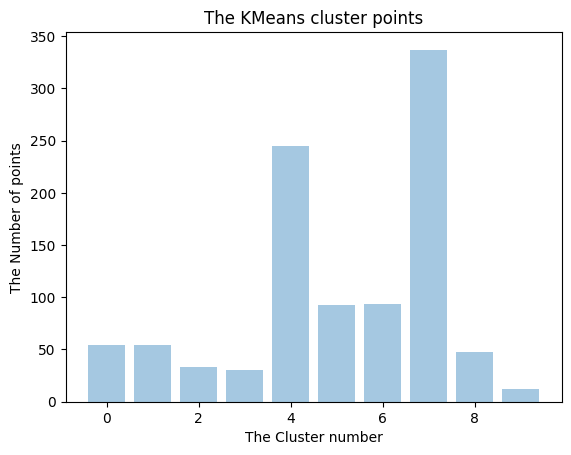

In [34]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('The KMeans cluster points')
plt.xlabel("The Cluster number")
plt.ylabel("The Number of points")
plt.show()

In [35]:
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Is a good product That I recomended it has all you will need, it's fast good looking very good,thank you


Good phone


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
I brought this phone as a replacement for my daughter, who is very hard on cell phones. I must say it was a great purchase. The phone work wonderful. Thank you


The phone was great but it had gotten old so it was time for a replacement.it was great while it lasted.


Great. Arrived quickly.


______________________________________________________________________
4 review of assigned to cluster  2
----------------------------------------------------------------------
excelente


Excelente


excelente


__________

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)
bow.shape

(1000, 3455)

In [38]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, init='k-means++', random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [39]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [40]:
from sklearn import metrics
print(metrics.silhouette_score(bow, labels, metric='euclidean'))

0.39528026327024723


In [41]:
cluster_data_df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,3,9
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,4,0


In [42]:
from sklearn.cluster import DBSCAN
import numpy as np

In [44]:
# Set the minimum number of points for density-based clustering
minPts = 2 * 100

# Function to find the lower bound in a sorted array
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

# Function to compute the distance of the 200th nearest neighbor
def compute_200th_nearest_neighbour(x, data):
    # Initialize an empty list to store distances
    dists = []

    # Calculate distances from 'x' to each point in 'data'
    for val in data:
        dist = np.sum((x - val) ** 2)  # Euclidean distance

        # Check if the distance should be included in the list
        if len(dists) == 200 and dists[199] > dist:
            # Use binary search to find the right position for the distance
            l = int(lower_bound(dists, dist))
            # Update the list if a closer distance is found
            if 0 <= l < 200 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()  # Keep the list sorted for efficient updates

    # Return the distance of the 200th nearest neighbor
    return dists[199]

In [45]:
list_of_sent_train = list()

for i in cluster_data_df["Lower casing"].values:
  list_of_sent_train.append(i.split())

In [47]:
import gensim

# Assuming list_of_sent_train contains your list of sentences
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

In [49]:
import numpy as np

# Initialize an empty list to store the average word2vec for each sentence/review
sent_vectors = []

# Iterate through each sentence/review in the list_of_sent_train
for sent in list_of_sent_train:
    # Initialize a vector of zeros for the sentence
    sent_vec = np.zeros(100)  # Assuming the word vectors are of length 100

    # Initialize a counter for the number of words with a valid vector in the sentence/review
    cnt_words = 1

    # Iterate through each word in the sentence/review
    for word in sent:
        try:
            # Get the word vector from the Word2Vec model
            vec = w2v_model.wv[word]
            # Add the vector to the sentence vector
            sent_vec += vec
            # Increment the word counter
            cnt_words += 1
        except:
            # Handle the case where the word is not in the Word2Vec model (skip)
            pass

    # Calculate the average by dividing the sum of vectors by the number of words
    sent_vec /= cnt_words

    # Append the average vector to the list of sentence vectors
    sent_vectors.append(sent_vec)

# Convert the list of sentence vectors to a NumPy array
sent_vectors = np.array(sent_vectors)

# Handle NaN values by replacing them with zeros
sent_vectors = np.nan_to_num(sent_vectors)


In [50]:
twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()

In [51]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [52]:
cluster_data_df['AVG-W2V Clus Label'] = model.labels_
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,3,9,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,4,0,0


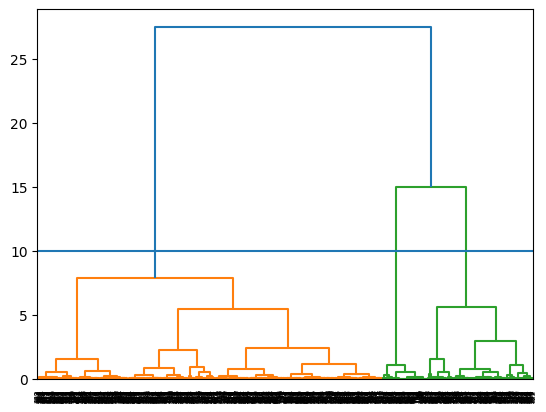

In [53]:
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10) # cut at 30 to get 5 clusters

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve
Agg=cluster.fit_predict(sent_vectors)

In [55]:
#Giving Labels/assigning a cluster to each point/text
aggdfa = cluster_data_df
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,3,9,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,4,0,0


In [56]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    512
1    161
2     92
3    184
4     51
Name: Reviews, dtype: int64

In [57]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
the reasons for the 3 star rating was it was in my opinion better than my iphone 4s but it tends to randomly crash, and r

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [58]:
'''A huge dataset is divided into a set number of clustes using k-means, which then generalizes them into various sizes and shapes. While it performs well with huge datasets, it is less effective with noisy data.
To distinguish between high-density and low-density clusters, DBscan is utilized. While it does well on noisy data, it struggles on huge datasets.
Similar items are grouped together into groupings known as clusters using a technique called hierarchical clustering. Using Hierarchical clusters to categorize the clusters is difficult.'''

'A huge dataset is divided into a set number of clustes using k-means, which then generalizes them into various sizes and shapes. While it performs well with huge datasets, it is less effective with noisy data. \nTo distinguish between high-density and low-density clusters, DBscan is utilized. While it does well on noisy data, it struggles on huge datasets. \nSimilar items are grouped together into groupings known as clusters using a technique called hierarchical clustering. Using Hierarchical clusters to categorize the clusters is difficult.'